Natural Language Processing with Disaster Tweets
This project is about predicting a Twitter tweet
For example, if the user input the tweet into the model, it will output 0 or 1. 0 means
the input twitter is not a disaster. Otherwise, 1 means the tweet is a disaster.

In [ ]:
!pip install pandas

In [3]:
!python3 --version

Python 3.12.7


In [4]:
!pip3 --version

pip 24.2 from /opt/anaconda3/lib/python3.12/site-packages/pip (python 3.12)


In [9]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
from torch.utils.data import Dataset, DataLoader

In [3]:
df = pd.read_csv('data/started/train.csv')

Example in the dataset

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
l[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [16]:
chars = sorted(l)
chars

['! Residents Return To Destroyed Homes As Washington Wildfire Burns on http://t.co/UcI8stQUg1',
 '# handbags Genuine Mulberry Antony Cross Body Messenger Bag Dark Oak Soft Buffalo Leather:  å£279.00End Date: W... http://t.co/FTM4RKl8mN',
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/9Naw3QOQOL",
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/aOd2ftBMGU",
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/eaTFro3d5x",
 "#360WiseNews : China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/gQskwqZuUl",
 "#3: TITAN WarriorCord 100 Feet - Authentic Military 550 Paracord - MIL-C-5040-H Type III 7 Strand 5/16' di... http://t.co/EEjRMKtJ0R",
 "#3Novices : Renison mine sees seismic event http://t.co/2i4EOGGO5j A small earthquake at Tasmania's Renison tin project has created a tem\x89Û_",
 '#4: The Hobbit: The Desolation of Smaug (Bilingual) http://t.co/G5dO2X6226

In [8]:
train_dataset = df
test_dataset = pd.read_csv('data/started/test.csv')

For this case, I am not going to take the keywords column. I only yake the 
target and the text

In [18]:
train_dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [19]:
test_dataset.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Exploratory Data Analysis (EDA)

From the Histogram, we can see many tweets doesn't have location or the keywords.

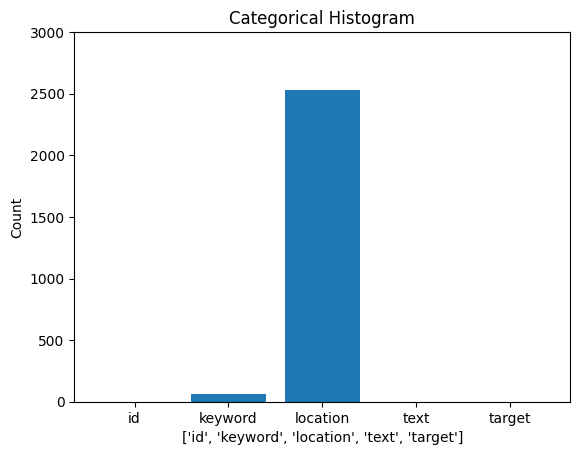

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample categorical data
categories = list(train_dataset.columns)
counts = list(train_dataset.isnull().sum())

plt.bar(categories, counts)
plt.ylim(0, 3000)
plt.xlabel(categories)
plt.ylabel('Count')
plt.title('Categorical Histogram')
plt.show()

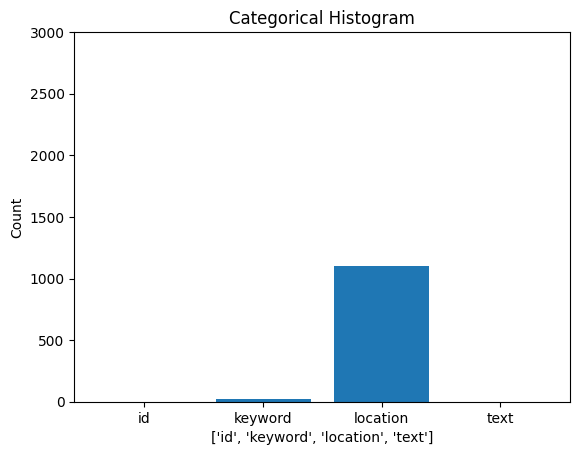

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample categorical data
categories = list(test_dataset.columns)
counts = list(test_dataset.isnull().sum())

plt.bar(categories, counts)
plt.ylim(0, 3000)
plt.xlabel(categories)
plt.ylabel('Count')
plt.title('Categorical Histogram')
plt.show()

My solution here is just input the text as the text has no null value as keyword and location. The model doesn't need id as it doesn't give useful information.

In [22]:
train_dataset.text.unique()

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'Suicide bomber kills 15 in Saudi security site mosque - Reuters via World - Google News - Wall ... http://t.co/nF4IculOje',
       'Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      shape=(7503,), dtype=object)

In [23]:
t_text, te_text = list(train_dataset.text), list(test_dataset.text)

In [155]:
test_dataset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [154]:
te_text[0]

'Just happened a terrible car crash'

In [160]:
test_data_id = list(test_dataset.id)


In [162]:
test_data_id[-1]

10875

In [24]:
t_target = list(train_dataset.target)

In [25]:
len(t_target)

7613

In [26]:
max([len(t) for t in t_text]), max([len(t) for t in te_text])

(157, 151)

In [27]:
l1 = list('abcd')
l2 = list('efgh')
l1+l2

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [28]:
chars = sorted(list(set(''.join(t_text+te_text))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['EOL'] = 0 
itos = {i:s for s, i in stoi.items()}
block_size = 157

In [29]:
import torch

In [30]:
len(t_text)

7613

In [31]:
n = int(0.9*len(t_text))
train_data = t_text[:n]
val_data = t_text[n:]

In [137]:
test_data = te_text

In [138]:
test_data[0]

'Just happened a terrible car crash'

In [32]:
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join(itos[i] for i in l)

In [33]:
ix = torch.randint(10, (32,))
ix

tensor([4, 3, 1, 4, 7, 2, 6, 0, 9, 5, 7, 3, 0, 0, 4, 9, 9, 2, 7, 7, 6, 7, 0, 4,
        2, 1, 9, 6, 3, 7, 7, 3])

In [ ]:
len(t_text)

7613

In [35]:
train_list = []
block_size = 256
for t in t_text:
    encoded = encode(t)
    remain_sz = block_size - len(encoded)
    remain = [0] * remain_sz
    context = encoded + remain
    train_list.append(context)

In [166]:
test_list = []

for t in te_text:
    encoded = encode(t)
    remain_sz = block_size - len(encoded)
    remain = [0] * remain_sz
    context = encoded + remain
    test_list.append(context)
data_test = torch.tensor(test_list, dtype=torch.long)
test_id = torch.tensor(test_data_id)

In [ ]:
data = torch.tensor(train_list, dtype=torch.long)
target = torch.tensor(t_target)

In [ ]:
data_test

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!',
 "No I don't like cold!",
 "NOOOOOOOOO! Don't do that!",
 "No don't tell me that!",
 'What if?!',
 'Awesome!',
 "Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU",
 '@sunkxssedharry will you wear shorts for race ablaze ?',
 '#PreviouslyOnDoyinTv: Toke Makinwa\x89Ûªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI',
 'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS 

In [164]:
#test_data_id

In [37]:
ix = torch.randint(len(data), (64,))
target[ix].shape

torch.Size([64])

In [38]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device

device(type='mps')

In [39]:
model = None
eval_iters = 200

In [ ]:
data.shape

torch.Size([7613, 256])

In [ ]:
batch_size = 32
n = int(0.9 * len(data)) #train valid split ratio 0.9
train_data, val_data = data[:n], data[n:]
def get_batch(split):
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data), (batch_size,))
    x = data[ix]
    y = target[ix]
    x, y = x.to(device), y.to(device)
    return x, y
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [42]:
from torch import nn 

In [43]:
import math
def new_gelu(x):
    return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

In [44]:
devcice = 'cpu'

Model Architecture

Using Transformer

In [45]:
class MLP(nn.Module):
    def __init__(self,n_embd):
        super().__init__()
        self.c_fc = nn.Linear(n_embd, 4*n_embd, bias = False)
        self.gelu = nn.GELU()
        self.c_proj = nn.Linear(4* n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

In [46]:
class Block(nn.Module):
    def __init__(self, n_embd, n_head):
        super().__init__()
        h_sz = n_embd// n_head
        self.attn = MHA(n_head, h_sz)
        self.mlp = MLP(n_embd)
        self.ln_1 = LayerNorm(n_embd)
        self.ln_2 = LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

In [102]:
bias = False
dropout = 0.4

In [118]:
class MHA(nn.Module):

    def __init__(self, n_head, h_sz):
        super().__init__()
        self.n_head = n_head
        n_embd = self.n_head * h_sz
        self.n_embd = n_embd
        # output proj
        self.c_proj = nn.Linear(n_embd, n_embd, bias=False)

        # reg
        self.attn_dropout = nn.Dropout(dropout)
        self.resid_dropout = nn.Dropout(dropout)

        # key, query, value
        self.c_attn = nn.Linear(n_embd, n_embd * 3, bias=bias)


        self.dropout =  nn.Dropout(dropout)
        
        self.dropout1 = 0.4
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")

            # self.register_buffer("bias", torch.tril(torch.ones(block_size, block_size))
            #                             .view(1, 1, block_size, block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)


        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        if self.flash:

            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout1 if self.training else 0, is_causal=True)
        else:

            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side


        y = self.resid_dropout(self.c_proj(y))
        return y


In [119]:
import math
import inspect
from dataclasses import dataclass

import torch
import torch.nn as nn
from torch.nn import functional as F

In [120]:
class LayerNorm(nn.Module):
    ''' LayerNorm but with an optional bias. Pytorch does support simply bias = False'''
    def __init__(self, ndim):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = None
    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5 )

In [121]:
l1 = LayerNorm(5)

In [122]:
vocab_size

127

In [ ]:
class NLP_Model(nn.Module):

    def __init__(self):
        super().__init__()
        assert vocab_size is not None
        assert block_size is not None
        

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(vocab_size, n_embd),
            wpe = nn.Embedding(block_size, n_embd),
            drop = nn.Dropout(dropout),
            h = nn.ModuleList([Block(n_embd, n_head) for _ in range(n_layer)]),
            ln_f = LayerNorm(n_embd),
        ))
        self.lm_head = nn.Linear(block_size * n_embd, 2, bias=False)
        
        # with weight tying when using torch.compile() some warnings get generated:
        # "UserWarning: functional_call was passed multiple values for tied weights.
        # This behavior is deprecated and will be an error in future versions"
        # not 100% sure what this is, so far seems to be harmless. TODO investigate
       #self.transformer.wte.weight = self.lm_head.weight # https://paperswithcode.com/method/weight-tying

        # init all weights
        self.apply(self._init_weights)
        # apply special scaled init to the residual projections, per GPT-2 paper
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                torch.nn.init.normal_(p, mean=0.0, std=0.02/math.sqrt(2 * n_layer))

        # report number of parameters
        print("number of parameters: %.2fM" % (self.get_num_params()/1e6,))

    def get_num_params(self, non_embedding=True):
        """
        Return the number of parameters in the model.
        For non-embedding count (default), the position embeddings get subtracted.
        The token embeddings would too, except due to the parameter sharing these
        params are actually used as weights in the final layer, so we include them.
        """
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        #print("Pass 1: ",idx.size())
        b, t = idx.size()
        #print("1 idx.size(): ", idx.size())
        #assert t <= self.block_size, f"Cannot forward sequence of length {t}, block size is only {self.block_size}"
        pos = torch.arange(0, t, dtype=torch.long, device=device) # shape (t)

        # forward the GPT model itself
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (b, t, n_embd)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (t, n_embd)
        
        #print("Pass 2")
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)
        #print("Pass 2: ",x.shape)
        #print("Pass 3")
        x = x.view(b, -1)
        #print("Pass 3: ",x.shape)
        #print("Pass 3a: ",self.lm_head.weight.shape)
        #print("Pass 4: ",self.lm_head.weight.shape)
        #print("Pass 4a: ",(t,n_embd))
        logits = self.lm_head(x) # (B,T X C ) ->(B,T X 2 )

        #print("Pass 5 logits: ",logits.shape)
        #loss = 10
        if targets is None:
            loss = None
        else:
            #B, out_dim = logits.size()
            #print("debug logits: ", logits.shape)
            #print("targets: ", targets.shape)
            # logits = logits.view(B*T, out_dim)

            # targets = targets.view(B*T)

            loss = F.cross_entropy(logits, targets)

        return logits, loss


In [124]:
device

device(type='mps')

In [125]:
batch_size = 64
block_size = 256 #157
max_iters = 5000
eval_interval = 500
lr = 1e-3
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
#device = 'cpu'
eval_iters = 200
n_embd = 512
n_head=8
n_layer = 6
dropout = 0.2

In [126]:
vocab_size = len(chars)
vocab_size

127

In [127]:
print(device)

mps


In [128]:
model = NLP_Model()
model = model.to(device)

number of parameters: 19.21M


In [129]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [133]:
get_batch('test')

(tensor([[50,  8, 76,  ...,  0,  0,  0],
         [39, 76, 79,  ...,  0,  0,  0],
         [32, 77, 85,  ...,  0,  0,  0],
         ...,
         [33,  2, 39,  ...,  0,  0,  0],
         [33, 78, 67,  ...,  0,  0,  0],
         [55, 73, 76,  ...,  0,  0,  0]], device='mps:0'),
 tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
         1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], device='mps:0'))

In [131]:
xb, yb = get_batch('train')
xb.shape

torch.Size([64, 256])

In [168]:
for iter in range(max_iters):
    if iter % eval_interval == 0 or iter ==max_iters-1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    xb, yb = get_batch('train')

    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()                                             

step 0: train loss 2.0907, val loss 1.9107
step 500: train loss 2.1543, val loss 2.7560
step 1000: train loss 2.2328, val loss 2.2609
step 1500: train loss 0.8612, val loss 0.9111
step 2000: train loss 0.6712, val loss 0.8314
step 2500: train loss 0.6529, val loss 0.7556
step 3000: train loss 0.6635, val loss 0.7560
step 3500: train loss 0.6700, val loss 0.8219
step 4000: train loss 0.6400, val loss 0.7661
step 4500: train loss 0.6650, val loss 0.8139
step 4999: train loss 0.6370, val loss 0.7260


In [207]:
# # Save model parameters
# torch.save(model.state_dict(), 'model_weights.pth')

# # Save optimizer state
# torch.save(optimizer.state_dict(), 'optimizer_state.pth')
model.eval()

NLP_Model(
  (transformer): ModuleDict(
    (wte): Embedding(127, 512)
    (wpe): Embedding(256, 512)
    (drop): Dropout(p=0.2, inplace=False)
    (h): ModuleList(
      (0-5): 6 x Block(
        (attn): MHA(
          (c_proj): Linear(in_features=512, out_features=512, bias=False)
          (attn_dropout): Dropout(p=0.2, inplace=False)
          (resid_dropout): Dropout(p=0.2, inplace=False)
          (c_attn): Linear(in_features=512, out_features=1536, bias=False)
          (dropout): Dropout(p=0.2, inplace=False)
        )
        (mlp): MLP(
          (c_fc): Linear(in_features=512, out_features=2048, bias=False)
          (gelu): GELU(approximate='none')
          (c_proj): Linear(in_features=2048, out_features=512, bias=True)
          (dropout): Dropout(p=0.2, inplace=False)
        )
        (ln_1): LayerNorm()
        (ln_2): LayerNorm()
      )
    )
    (ln_f): LayerNorm()
  )
  (lm_head): Linear(in_features=131072, out_features=2, bias=False)
)

In [ ]:
@torch.no_grad()
def estimate_loss_test():
    result = {}
    for id, text in zip(test_id, data_test):

        
        logits, loss = model(text.view(1,256).to('mps'))
        result[id.item()] = torch.argmax(logits, dim=-1).item()

    return result

tensor([[ 0.7684, -1.1029]], device='mps:0')

In [287]:
torch.argmax(out[0][0], dim=-1)

tensor([0], device='mps:0')

In [266]:
data_test.shape

torch.Size([3263, 256])

In [292]:
out = estimate_loss_test()

In [317]:
df1 = pd.DataFrame.from_dict(out, orient='index', columns=['target']) \
                 .reset_index() \
                 .rename(columns={'index': 'id'})

In [305]:
out[75]

1

In [318]:
df1

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [320]:
df1.to_csv('output.csv', index=False)

In [239]:
wte1 = nn.Embedding(vocab_size, n_embd)
wte1.weight.shape

torch.Size([127, 512])

In [216]:
device

device(type='mps')

In [219]:
x1 = data_test[0].view(1,256)
x1.to('mps')
print(x1.device)

cpu


In [220]:
x1 = data_test[0].view(1,256)
x1.to('mps')
print(x1.device)

cpu


In [ ]:
x1 = data_test[0].view(1,256)
x1.to('mps')
print(x1.device)

In [227]:
# Check model device
print(next(model.parameters()).device)  # Should output: mps:0

# Check tensor device'
data = torch.randn(3, 10).to("mps")
print(data_test.device)  # Should output: mps:0

mps:0
cpu


In [210]:
data_test[0].view(32,-1).size()

torch.Size([32, 8])

Results and Analysis

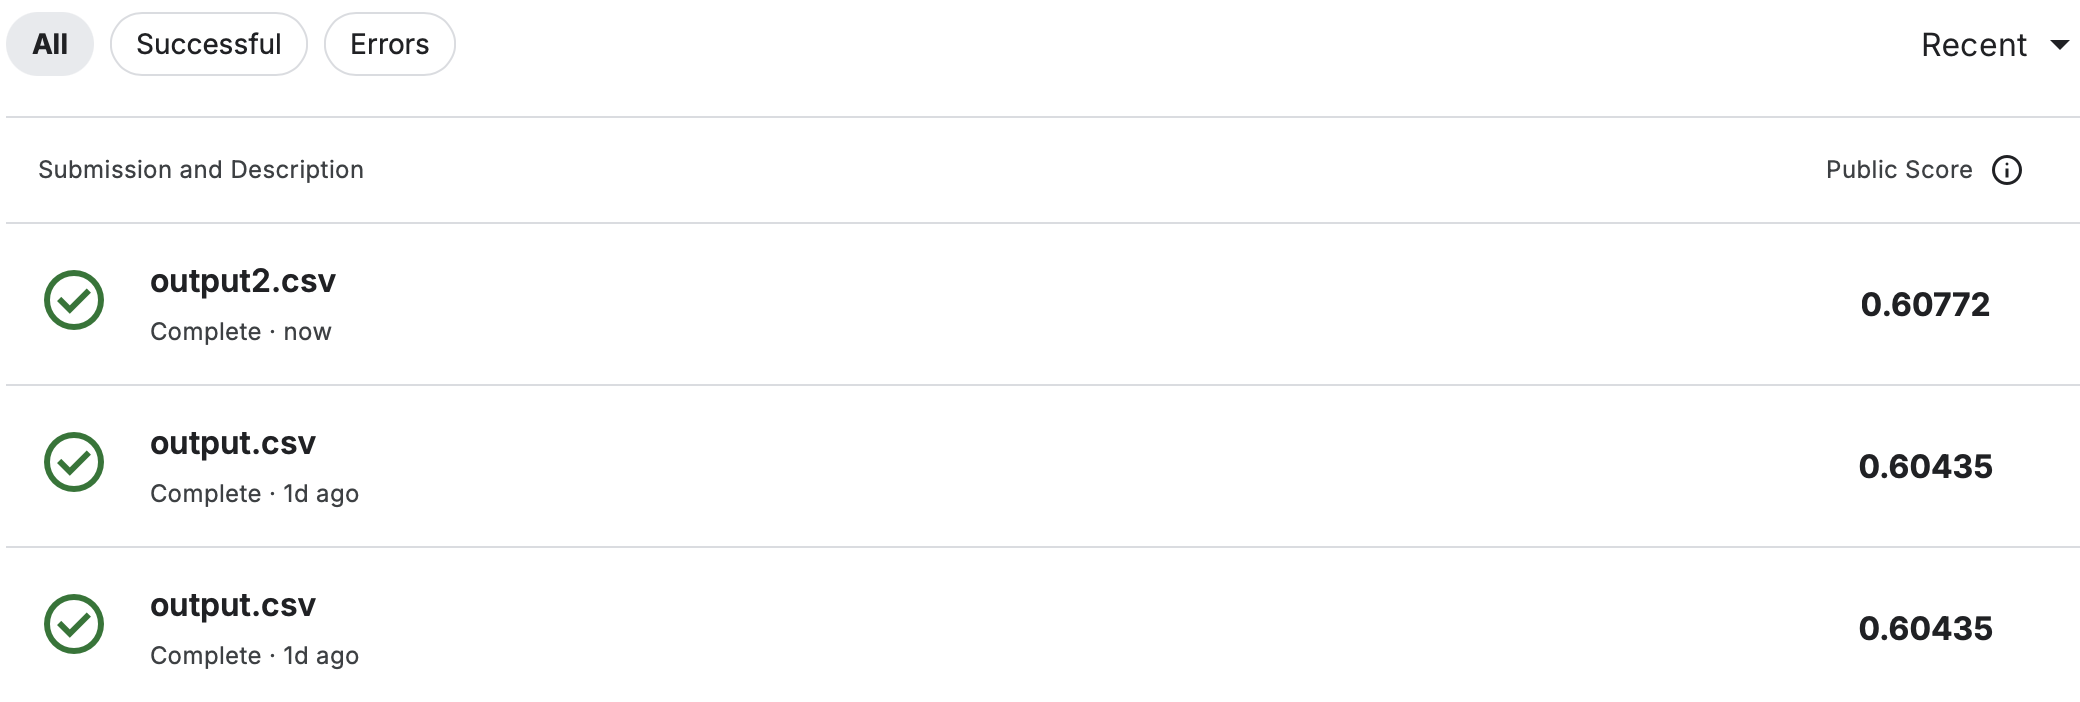

I have increased the model size, and they are the number of layers, emb_dim, and number of heads.
The highest one has 0.60772. It is the result of increasing the model. It looks like increasing the model size can help.

Conclusion:
I did not totally clan the data. For example, to clean the corrupted text before inputting into the Transformer model. I though deep learning model can handle the unstructed model very well. But it is not when the model size is small. I believe using decision tree as a smaller model or even smaller dataset can have a great result compairing to the transformer. However, this naive training and model can not really proof transformer is poor in this task.